In [327]:
# importing python packages/libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

PALETTE = 'flare'
PALETTE2 = 'deep'  #for categorical or contrasted data
PALETTE3 = 'Oranges'  #for plotly
sns.set_theme(context='notebook', style='whitegrid', palette=PALETTE)

In [328]:
df_robusta_coffee = pd.read_csv('robusta_cleaned_data.csv')
df_arabica_coffee = pd.read_csv('arabica_cleaned_data.csv')
display(df_robusta_coffee.head())
display(df_arabica_coffee.head())


,Quality_Score,Species,Owner,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,...,10.0,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,Uganda Coffee Development Authority,365
1,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,...,10.0,7.92,8.00,Sample 83.50,0 %,0 full defects,NaN,2 full defects,Specialty Coffee Association,365
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,...,10.0,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
3,83.00,Robusta,UGACOF,Uganda,UGACOF project area,UGACOF Ltd,1212,Central,UGACOF,320,...,10.0,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,Uganda Coffee Development Authority,365
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,...,10.0,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,Uganda Coffee Development Authority,365


,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,Unknown,NaN,5,Specialty Coffee Association,...,10.0,10.0,9.25,Sample 89.75,0%,0 full defects,None,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.0,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.0,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365


In [329]:
df_robusta_coffee.drop(['Farm Name'],axis=1,inplace=True) 
df_robusta_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,Uganda Coffee Development Authority,...,10.0,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,Uganda Coffee Development Authority,365
1,83.50,Robusta,Nishant Gurjer,India,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,Specialty Coffee Association,...,10.0,7.92,8.00,Sample 83.50,0 %,0 full defects,NaN,2 full defects,Specialty Coffee Association,365
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,Specialty Coffee Association,...,10.0,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
3,83.00,Robusta,UGACOF,Uganda,UGACOF Ltd,1212,Central,UGACOF,320,Uganda Coffee Development Authority,...,10.0,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,Uganda Coffee Development Authority,365
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,Uganda Coffee Development Authority,...,10.0,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,Uganda Coffee Development Authority,365


In [330]:
df_robusta_coffee.columns.difference(df_arabica_coffee.columns)

Index([], dtype='object')

In [331]:
df_coffee_reviews = pd.concat(
    [df_arabica_coffee, df_robusta_coffee],
    ignore_index=True,
    sort=False
)

df_coffee_reviews.head(10)

,Quality_Score,Species,Owner,Country of Origin,Company,Altitude,Region,Producer,Number of Bags,In-Country Partner,...,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,90.58,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.00,8.75,Sample 90.58,12%,0 full defects,Green,0 full defects,METAD Agricultural Development plc,365
1,89.92,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.00,8.58,Sample 89.92,12%,0 full defects,Green,1 full defects,METAD Agricultural Development plc,365
2,89.75,Arabica,Grounds for Health Admin,Guatemala,NaN,1600 - 1800 m,Unknown,NaN,5,Specialty Coffee Association,...,10.0,10.00,9.25,Sample 89.75,0%,0 full defects,None,0 full defects,Specialty Coffee Association,365
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,METAD Agricultural Development plc,...,10.0,10.00,8.67,Sample 89.00,11%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
4,88.83,Arabica,metad plc,Ethiopia,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,METAD Agricultural Development plc,...,10.0,10.00,8.58,Sample 88.83,12%,0 full defects,Green,2 full defects,METAD Agricultural Development plc,365
5,88.83,Arabica,Ji-Ae Ahn,Brazil,NaN,NaN,Unknown,NaN,100,Specialty Coffee Institute of Asia,...,10.0,10.00,8.33,Sample 88.83,11%,0 full defects,Bluish-Green,1 full defects,Specialty Coffee Institute of Asia,365
6,88.75,Arabica,Hugo Valdivia,Peru,Richmond Investment-coffee department,NaN,Unknown,HVC,100,Specialty Coffee Institute of Asia,...,10.0,10.00,8.50,Sample 88.75,11%,0 full defects,Bluish-Green,0 full defects,Specialty Coffee Institute of Asia,365
7,88.67,Arabica,Ethiopia Commodity Exchange,Ethiopia,NaN,1570-1700,Oromia,Bazen Agricultural & Industrial Dev't Plc,300,Ethiopia Commodity Exchange,...,10.0,9.33,9.00,Sample 88.67,3%,0 full defects,None,0 full defects,Ethiopia Commodity Exchange,365
8,88.42,Arabica,Ethiopia Commodity Exchange,Ethiopia,NaN,1570-1700,Oromiya,Bazen Agricultural & Industrial Dev't Plc,300,Ethiopia Commodity Exchange,...,10.0,9.33,8.67,Sample 88.42,3%,0 full defects,None,0 full defects,Ethiopia Commodity Exchange,365
9,88.25,Arabica,Diamond Enterprise Plc,Ethiopia,DIAMOND ENTERPRISE PLC,1795-1850,"SNNP/Kaffa Zone,GimboWereda",Diamond Enterprise Plc,50,METAD Agricultural Development plc,...,10.0,10.00,8.50,Sample 88.25,10%,0 full defects,Green,4 full defects,METAD Agricultural Development plc,365


In [332]:
merged_data_cleaned = df_coffee_reviews.to_csv('merged_data_cleaned.csv',index= False)

In [333]:
categories = ['Species','Country of Origin','Color','Region'] 

df_coffee_reviews[categories] = df_coffee_reviews[categories].astype('category')
display(df_coffee_reviews[categories].describe())

,Species,Country of Origin,Color,Region
count,1339,1339,1337,1337
unique,2,36,4,484
top,Arabica,Mexico,Green,ORIENTE
freq,1311,236,870,66


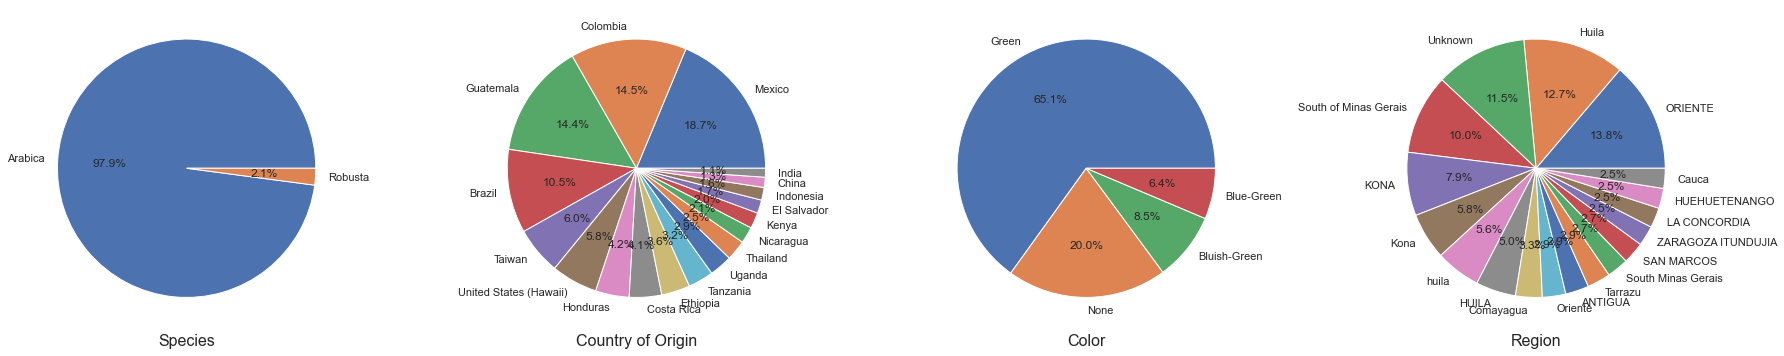

In [334]:
with sns.color_palette(PALETTE2):
    fig, axs = plt.subplots(1, 4, figsize=(25,25), tight_layout=True)
    for i, col in enumerate(categories):
        n_max = min(18,len(df_coffee_reviews[col].unique()))  # max number of categories to show
        axs[i].pie(df_coffee_reviews[col].value_counts()[:n_max], labels=df_coffee_reviews[col].value_counts()[:n_max].index, autopct='%1.1f%%')
        axs[i].set_xlabel(col, fontsize=16)
        
    plt.show()